In [1]:
import numpy as np
from pose_format import Pose
from pose_format.pose_visualizer import PoseVisualizer

In [2]:
pose_file_1 = '../data/pose_files/SGB_FSS.pose'
pose_file_2 = '../data/pose_files/SGB_FSS_skew_right.pose'
pose_file_3 = '../data/pose_files/SGB_FSS_zoomout .pose'
pose_file_4 = '../data/pose_files/SGB_FSS_original.pose'
save_path = "../output/05_Normalization/"

In [3]:

def load_pose(path: str) -> Pose:
    with open(path, 'rb') as f:
        return Pose.read(f.read())

def save_as_pose(pose: Pose, output_path: str):
    """
    Saves a Pose object to a .pose file.
    """
    with open(output_path, 'wb') as f:
        pose.write(f)
    print(f"✅ Saved to: {output_path}")

In [4]:
pose_file_1 = load_pose(pose_file_1)
pose_file_2 = load_pose(pose_file_2)
pose_file_3 = load_pose(pose_file_3)
pose_file_4 = load_pose(pose_file_4)

save_as_pose(pose_file_1, save_path + "saved_example_without_scaling_1.pose")
save_as_pose(pose_file_2, save_path + "saved_example_without_scaling_2.pose")
save_as_pose(pose_file_3, save_path + "saved_example_without_scaling_3.pose")
save_as_pose(pose_file_4, save_path + "saved_example_without_scaling_4.pose")

✅ Saved to: ../output/05_Normalization/saved_example_without_scaling_1.pose
✅ Saved to: ../output/05_Normalization/saved_example_without_scaling_2.pose
✅ Saved to: ../output/05_Normalization/saved_example_without_scaling_3.pose
✅ Saved to: ../output/05_Normalization/saved_example_without_scaling_4.pose


## 1️⃣ Normalization

### 🎯 What is Normalization and Why Do We Need It?

**The Problem:**
When recording different videos, there might be:
- A person close to or far from the camera
- A person on the side of the frame or in the center
- People of different sizes (tall/short, child/adult)

**The Solution:**
Normalization makes all data in a unified scale, which facilitates comparison and training.


### 2.1 Basic Normalization

**How it works:**
1. **Center**: Moves the midpoint between the shoulders to coordinate (0, 0)
2. **Scale**: Makes the distance between shoulders = 1


In [5]:
def normalize_pose_basic(pose: Pose) -> Pose:
    """
    Basic normalization using two shoulder points
    
    - Moves the center of shoulders to (0, 0)
    - Scales the distance between shoulders to be 1
    """
    pose_copy = pose.copy()
    pose_copy.normalize()
    
    print("✅ Basic normalization completed")
    return pose_copy



In [6]:
norm_file_1 = normalize_pose_basic(pose_file_1)
norm_file_2 = normalize_pose_basic(pose_file_2)
norm_file_3 = normalize_pose_basic(pose_file_3)
norm_file_4 = normalize_pose_basic(pose_file_4)

save_as_pose(norm_file_1, save_path + "file_1_basic_normalized.pose")
save_as_pose(norm_file_2, save_path + "file_2_basic_normalized.pose")
save_as_pose(norm_file_3, save_path + "file_3_basic_normalized.pose")
save_as_pose(norm_file_4, save_path + "file_4_basic_normalized.pose")

✅ Basic normalization completed
✅ Basic normalization completed
✅ Basic normalization completed
✅ Basic normalization completed
✅ Saved to: ../output/05_Normalization/file_1_basic_normalized.pose
✅ Saved to: ../output/05_Normalization/file_2_basic_normalized.pose
✅ Saved to: ../output/05_Normalization/file_3_basic_normalized.pose
✅ Saved to: ../output/05_Normalization/file_4_basic_normalized.pose


In [7]:
print("Data shape before normalization:")
print(pose_file_1.body.data[0][0][0])

print("Data shape after basic normalization:")
print(norm_file_1.body.data[0][0][0])

Data shape before normalization:
[655.3140869140625 180.29281616210938 -0.627777636051178]
Data shape after basic normalization:
[-0.012239675968885422 -0.5772872567176819 -0.002047558082267642]


In [8]:
# 📊 Comprehensive analysis of data before and after normalization

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [9]:
def analyze_pose_data(pose: Pose, name: str = "Pose"):
    """
    Comprehensive analysis of pose data
    Displays statistics, values, and ranges
    """
    # Get the data
    data = pose.body.data
    
    print(f"\n{'='*60}")
    print(f"📊 Analysis: {name}")
    print(f"{'='*60}\n")
    
    # Basic information
    num_dims = data.shape[3]
    print(f"🔹 Overall Shape: {data.shape}")
    print(f"   - Number of Frames: {data.shape[0]}")
    print(f"   - Number of People: {data.shape[1]}")
    print(f"   - Number of Points: {data.shape[2]}")
    if num_dims == 3:
        print(f"   - Dimensions: {num_dims} (x, y, z)\n")
    else:
        print(f"   - Dimensions: {num_dims} (x, y, z, confidence)\n")
    
    # Statistics for each dimension
    print(f"📈 Statistics for Each Dimension:")
    print(f"{'-'*60}")
    
    # Determine dimensions based on actual count
    if num_dims == 3:
        dimensions = ['X (width)', 'Y (height)', 'Z (depth)']
    else:
        dimensions = ['X (width)', 'Y (height)', 'Z (depth)', 'Confidence']
    
    for dim_idx, dim_name in enumerate(dimensions):
        if dim_idx < num_dims:
            dim_data = data[:, :, :, dim_idx]
            
            # Ignore zero values (missing points)
            valid_data = dim_data[dim_data != 0]
            
            if len(valid_data) > 0:
                print(f"\n{dim_name}:")
                print(f"  ├─ Minimum (Min):      {valid_data.min():.4f}")
                print(f"  ├─ Maximum (Max):      {valid_data.max():.4f}")
                print(f"  ├─ Mean:               {valid_data.mean():.4f}")
                print(f"  ├─ Std Deviation:      {valid_data.std():.4f}")
                print(f"  └─ Range:              {valid_data.max() - valid_data.min():.4f}")
    
    print(f"\n{'='*60}\n")
    
    return data

# Analyze original data (before normalization)
data_before = analyze_pose_data(pose_file_1, "📦 Original Data")


📊 Analysis: 📦 Original Data

🔹 Overall Shape: (165, 1, 203, 3)
   - Number of Frames: 165
   - Number of People: 1
   - Number of Points: 203
   - Dimensions: 3 (x, y, z)

📈 Statistics for Each Dimension:
------------------------------------------------------------

X (width):
  ├─ Minimum (Min):      314.9395
  ├─ Maximum (Max):      1029.9127
  ├─ Mean:               652.6351
  ├─ Std Deviation:      86.3371
  └─ Range:              714.9733

Y (height):
  ├─ Minimum (Min):      91.8943
  ├─ Maximum (Max):      1459.3276
  ├─ Mean:               311.1322
  ├─ Std Deviation:      249.7183
  └─ Range:              1367.4333

Z (depth):
  ├─ Minimum (Min):      -1.2075
  ├─ Maximum (Max):      0.4833
  ├─ Mean:               -0.0482
  ├─ Std Deviation:      0.1675
  └─ Range:              1.6908




In [10]:
data_after = analyze_pose_data(norm_file_1, "✨ Normalized Data")


📊 Analysis: ✨ Normalized Data

🔹 Overall Shape: (165, 1, 203, 3)
   - Number of Frames: 165
   - Number of People: 1
   - Number of Points: 203
   - Dimensions: 3 (x, y, z)

📈 Statistics for Each Dimension:
------------------------------------------------------------

X (width):
  ├─ Minimum (Min):      -1.2260
  ├─ Maximum (Max):      1.3236
  ├─ Mean:               -0.0218
  ├─ Std Deviation:      0.3079
  └─ Range:              2.5496

Y (height):
  ├─ Minimum (Min):      -0.8925
  ├─ Maximum (Max):      3.9838
  ├─ Mean:               -0.1107
  ├─ Std Deviation:      0.8905
  └─ Range:              4.8763

Z (depth):
  ├─ Minimum (Min):      -0.0041
  ├─ Maximum (Max):      0.0019
  ├─ Mean:               0.0000
  ├─ Std Deviation:      0.0006
  └─ Range:              0.0060




In [11]:

def show_sample_points(pose: Pose, name: str = "Pose", num_frames: int = 3):
    """
    Display a sample of actual coordinates
    """
    data = pose.body.data
    
    print(f"\n{'='*60}")
    print(f"📍 Sample Points: {name}")
    print(f"{'='*60}\n")
    
    # Select random frames
    frame_indices = [0, data.shape[0]//2, data.shape[0]-1][:num_frames]
    
    # Important points to display
    important_points = [0, 11, 12, 13, 14, 15, 16]  # Nose, Shoulders, Elbows, Wrists
    point_names = ["Nose", "L_Shoulder", "R_Shoulder", "L_Elbow", "R_Elbow", "L_Wrist", "R_Wrist"]
    
    num_dims = data.shape[3]
    
    for frame_idx in frame_indices:
        print(f"\n📍 Frame Number {frame_idx}:")
        print(f"{'─'*60}")
        
        for pt_idx, pt_name in zip(important_points, point_names):
            if pt_idx < data.shape[2]:
                point = data[frame_idx, 0, pt_idx, :]
                if num_dims == 3:
                    print(f"  {pt_name:12} → X:{point[0]:8.3f}, Y:{point[1]:8.3f}, Z:{point[2]:8.3f}")
                else:
                    print(f"  {pt_name:12} → X:{point[0]:8.3f}, Y:{point[1]:8.3f}, Z:{point[2]:8.3f}, C:{point[3]:8.3f}")
    
    print(f"\n{'='*60}\n")

# Display sample of actual points
show_sample_points(pose_file_1, "📦 Original Data")



📍 Sample Points: 📦 Original Data


📍 Frame Number 0:
────────────────────────────────────────────────────────────
  Nose         → X: 655.314, Y: 180.293, Z:  -0.628
  L_Shoulder   → X: 799.615, Y: 349.187, Z:  -0.219
  R_Shoulder   → X: 507.798, Y: 345.863, Z:  -0.190
  L_Elbow      → X: 848.239, Y: 579.262, Z:  -0.247
  R_Elbow      → X: 442.856, Y: 567.440, Z:  -0.242
  L_Wrist      → X: 710.023, Y: 627.724, Z:  -0.535
  R_Wrist      → X: 562.861, Y: 617.023, Z:  -0.556

📍 Frame Number 82:
────────────────────────────────────────────────────────────
  Nose         → X: 668.713, Y: 197.930, Z:  -0.359
  L_Shoulder   → X: 789.563, Y: 344.491, Z:   0.044
  R_Shoulder   → X: 505.958, Y: 348.958, Z:   0.056
  L_Elbow      → X: 860.253, Y: 590.325, Z:  -0.135
  R_Elbow      → X: 432.790, Y: 594.933, Z:  -0.139
  L_Wrist      → X: 875.083, Y: 471.829, Z:  -0.646
  R_Wrist      → X: 443.683, Y: 469.791, Z:  -0.661

📍 Frame Number 164:
───────────────────────────────────────────────────────

In [12]:
# Display sample points after normalization
show_sample_points(norm_file_1, "✨ Normalized Data")


📍 Sample Points: ✨ Normalized Data


📍 Frame Number 0:
────────────────────────────────────────────────────────────
  Nose         → X:  -0.012, Y:  -0.577, Z:  -0.002
  L_Shoulder   → X:   0.502, Y:   0.025, Z:  -0.001
  R_Shoulder   → X:  -0.538, Y:   0.013, Z:  -0.000
  L_Elbow      → X:   0.676, Y:   0.845, Z:  -0.001
  R_Elbow      → X:  -0.770, Y:   0.803, Z:  -0.001
  L_Wrist      → X:   0.183, Y:   1.018, Z:  -0.002
  R_Wrist      → X:  -0.342, Y:   0.980, Z:  -0.002

📍 Frame Number 82:
────────────────────────────────────────────────────────────
  Nose         → X:   0.036, Y:  -0.514, Z:  -0.001
  L_Shoulder   → X:   0.466, Y:   0.008, Z:   0.000
  R_Shoulder   → X:  -0.545, Y:   0.024, Z:   0.000
  L_Elbow      → X:   0.719, Y:   0.885, Z:  -0.000
  R_Elbow      → X:  -0.806, Y:   0.901, Z:  -0.000
  L_Wrist      → X:   0.771, Y:   0.462, Z:  -0.002
  R_Wrist      → X:  -0.767, Y:   0.455, Z:  -0.002

📍 Frame Number 164:
─────────────────────────────────────────────────────

In [13]:

def compare_before_after(pose_before: Pose, pose_after: Pose, 
                        name_before: str = "Before", name_after: str = "After"):
    """
    Comprehensive comparison between two poses
    """
    print(f"\n{'='*70}")
    print(f"🔄 Comparison: {name_before} vs {name_after}")
    print(f"{'='*70}\n")
    
    data_before = pose_before.body.data
    data_after = pose_after.body.data
    
    # Determine number of dimensions
    num_dims_before = data_before.shape[3]
    num_dims_after = data_after.shape[3]
    num_dims = min(num_dims_before, num_dims_after)
    
    if num_dims == 3:
        dimensions = ['X', 'Y', 'Z']
    else:
        dimensions = ['X', 'Y', 'Z', 'Confidence']
    
    print(f"{'Dimension':<15} {'Before (Min/Max)':<25} {'After (Min/Max)':<25} {'Change'}")
    print(f"{'-'*70}")
    
    for dim_idx, dim_name in enumerate(dimensions[:num_dims]):
        before_dim = data_before[:, :, :, dim_idx]
        after_dim = data_after[:, :, :, dim_idx]
        
        valid_before = before_dim[before_dim != 0]
        valid_after = after_dim[after_dim != 0]
        
        if len(valid_before) > 0 and len(valid_after) > 0:
            before_range = f"{valid_before.min():.2f} / {valid_before.max():.2f}"
            after_range = f"{valid_after.min():.2f} / {valid_after.max():.2f}"
            
            # Calculate range change
            range_change = (valid_after.max() - valid_after.min()) / (valid_before.max() - valid_before.min())
            change_str = f"×{range_change:.2f}"
            
            print(f"{dim_name:<15} {before_range:<25} {after_range:<25} {change_str}")
    
    print(f"{'='*70}\n")

# Comprehensive comparison
compare_before_after(pose_file_1, norm_file_1, "Original Data", "Normalized Data")


🔄 Comparison: Original Data vs Normalized Data

Dimension       Before (Min/Max)          After (Min/Max)           Change
----------------------------------------------------------------------
X               314.94 / 1029.91          -1.23 / 1.32              ×0.00
Y               91.89 / 1459.33           -0.89 / 3.98              ×0.00
Z               -1.21 / 0.48              -0.00 / 0.00              ×0.00



### 📊 Visual Comparison Charts

Multiple visualization types to understand the differences between normalized and non-normalized data

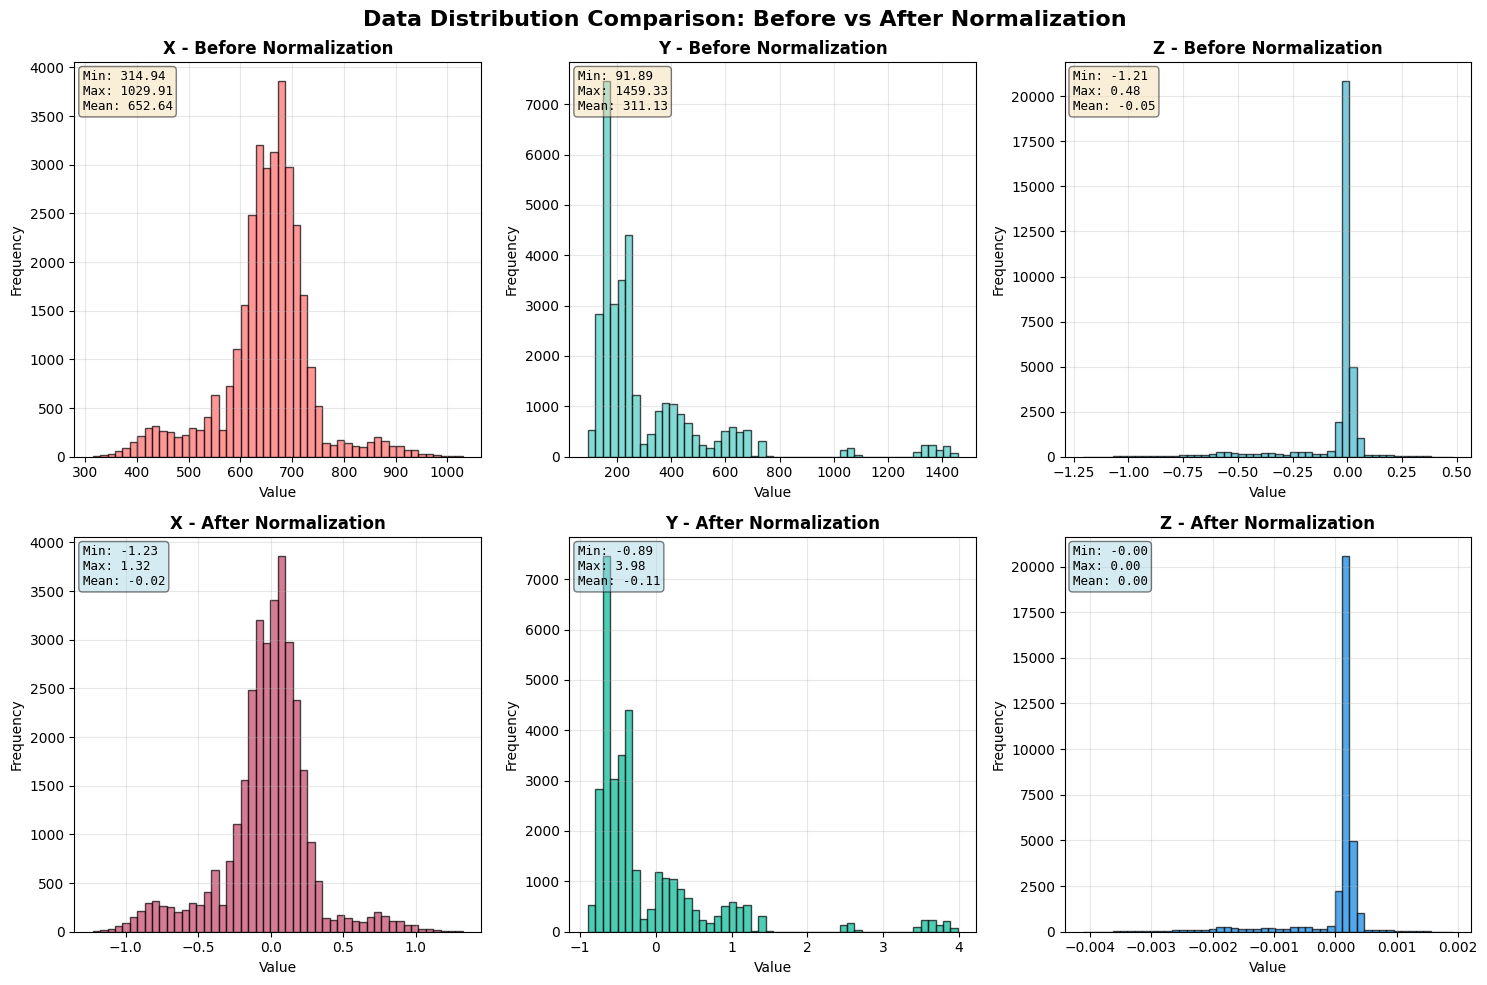

In [14]:
# Histogram comparison plot
def plot_histogram_comparison(pose_before: Pose, pose_after: Pose):
    """
    Histogram plot showing value distribution before and after normalization
    """
    data_before = pose_before.body.data
    data_after = pose_after.body.data
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Data Distribution Comparison: Before vs After Normalization', fontsize=16, weight='bold')
    
    dimensions = ['X', 'Y', 'Z']
    colors_before = ['#ff6b6b', '#4ecdc4', '#45b7d1']
    colors_after = ['#c44569', '#00b894', '#0984e3']
    
    for dim_idx, dim_name in enumerate(dimensions):
        # Before normalization
        ax_before = axes[0, dim_idx]
        before_data = data_before[:, :, :, dim_idx].flatten()
        before_valid = before_data[before_data != 0]
        
        ax_before.hist(before_valid, bins=50, color=colors_before[dim_idx], alpha=0.7, edgecolor='black')
        ax_before.set_title(f'{dim_name} - Before Normalization', fontsize=12, weight='bold')
        ax_before.set_xlabel('Value')
        ax_before.set_ylabel('Frequency')
        ax_before.grid(True, alpha=0.3)
        
        # Add statistics
        stats_text = f'Min: {before_valid.min():.2f}\nMax: {before_valid.max():.2f}\nMean: {before_valid.mean():.2f}'
        ax_before.text(0.02, 0.98, stats_text, transform=ax_before.transAxes,
                        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                        fontsize=9, family='monospace')
            
        # After normalization
        ax_after = axes[1, dim_idx]
        after_data = data_after[:, :, :, dim_idx].flatten()
        after_valid = after_data[after_data != 0]
        
        ax_after.hist(after_valid, bins=50, color=colors_after[dim_idx], alpha=0.7, edgecolor='black')
        ax_after.set_title(f'{dim_name} - After Normalization', fontsize=12, weight='bold')
        ax_after.set_xlabel('Value')
        ax_after.set_ylabel('Frequency')
        ax_after.grid(True, alpha=0.3)
        
        # Add statistics
        stats_text = f'Min: {after_valid.min():.2f}\nMax: {after_valid.max():.2f}\nMean: {after_valid.mean():.2f}'
        ax_after.text(0.02, 0.98, stats_text, transform=ax_after.transAxes,
                        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5),
                        fontsize=9, family='monospace')
    
    plt.tight_layout()
    plt.show()

plot_histogram_comparison(pose_file_1, norm_file_1)

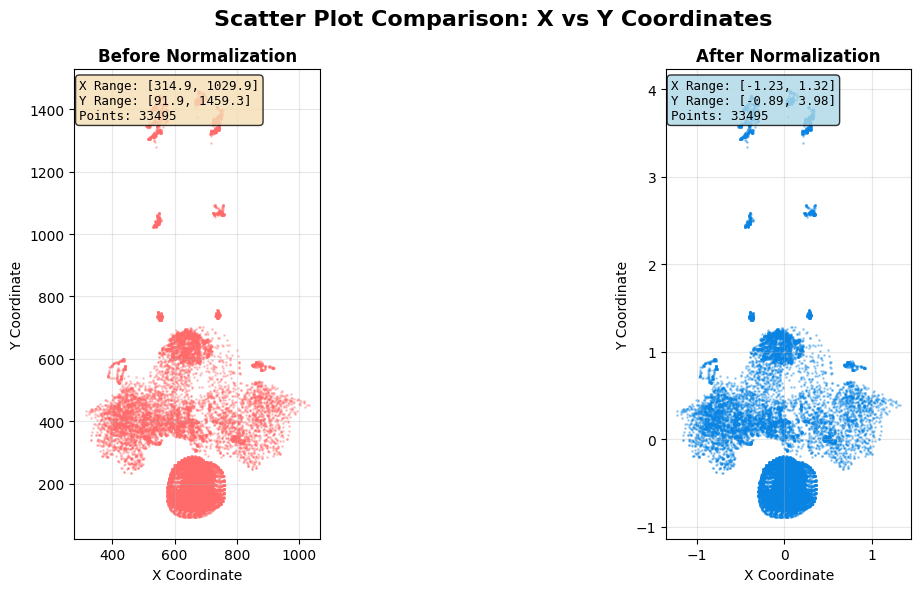

In [15]:
# Scatter plot comparison for X vs Y
def plot_scatter_comparison(pose_before: Pose, pose_after: Pose):
    """
    Scatter plot showing spatial distribution before and after normalization
    """
    data_before = pose_before.body.data
    data_after = pose_after.body.data
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('Scatter Plot Comparison: X vs Y Coordinates', fontsize=16, weight='bold')
    
    # Before normalization
    ax_before = axes[0]
    x_before = data_before[:, :, :, 0].flatten()
    y_before = data_before[:, :, :, 1].flatten()
    
    # Filter valid points
    valid_mask = (x_before != 0) & (y_before != 0)
    x_before_valid = x_before[valid_mask]
    y_before_valid = y_before[valid_mask]
    
    ax_before.scatter(x_before_valid, y_before_valid, alpha=0.3, s=1, c='#ff6b6b')
    ax_before.set_title('Before Normalization', fontsize=12, weight='bold')
    ax_before.set_xlabel('X Coordinate')
    ax_before.set_ylabel('Y Coordinate')
    ax_before.grid(True, alpha=0.3)
    ax_before.set_aspect('equal', adjustable='box')
    
    # Add statistics
    stats_text = f'X Range: [{x_before_valid.min():.1f}, {x_before_valid.max():.1f}]\n'
    stats_text += f'Y Range: [{y_before_valid.min():.1f}, {y_before_valid.max():.1f}]\n'
    stats_text += f'Points: {len(x_before_valid)}'
    ax_before.text(0.02, 0.98, stats_text, transform=ax_before.transAxes,
                  verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                  fontsize=9, family='monospace')
    
    # After normalization
    ax_after = axes[1]
    x_after = data_after[:, :, :, 0].flatten()
    y_after = data_after[:, :, :, 1].flatten()
    
    # Filter valid points
    valid_mask = (x_after != 0) & (y_after != 0)
    x_after_valid = x_after[valid_mask]
    y_after_valid = y_after[valid_mask]
    
    ax_after.scatter(x_after_valid, y_after_valid, alpha=0.3, s=1, c='#0984e3')
    ax_after.set_title('After Normalization', fontsize=12, weight='bold')
    ax_after.set_xlabel('X Coordinate')
    ax_after.set_ylabel('Y Coordinate')
    ax_after.grid(True, alpha=0.3)
    ax_after.set_aspect('equal', adjustable='box')
    
    # Add statistics
    stats_text = f'X Range: [{x_after_valid.min():.2f}, {x_after_valid.max():.2f}]\n'
    stats_text += f'Y Range: [{y_after_valid.min():.2f}, {y_after_valid.max():.2f}]\n'
    stats_text += f'Points: {len(x_after_valid)}'
    ax_after.text(0.02, 0.98, stats_text, transform=ax_after.transAxes,
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
                 fontsize=9, family='monospace')
    
    plt.tight_layout()
    plt.show()

plot_scatter_comparison(pose_file_1, norm_file_1)

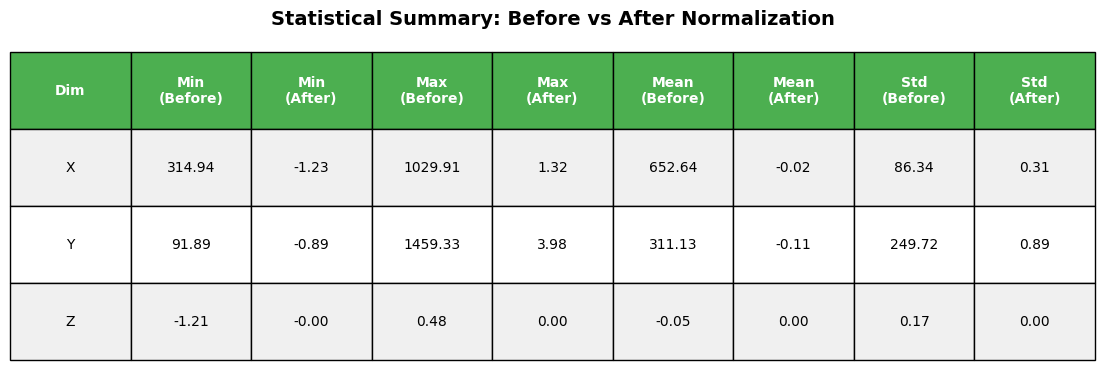

In [16]:
# Statistics summary table
def plot_statistics_table(pose_before: Pose, pose_after: Pose):
    """
    Visual table showing detailed statistics comparison
    """
    data_before = pose_before.body.data
    data_after = pose_after.body.data
    
    dimensions = ['X', 'Y', 'Z']
    stats_data = []
    
    for dim_idx, dim_name in enumerate(dimensions):
        before_data = data_before[:, :, :, dim_idx].flatten()
        before_valid = before_data[before_data != 0]
        
        after_data = data_after[:, :, :, dim_idx].flatten()
        after_valid = after_data[after_data != 0]
        
        stats_data.append([
            dim_name,
            f"{before_valid.min():.2f}",
            f"{after_valid.min():.2f}",
            f"{before_valid.max():.2f}",
            f"{after_valid.max():.2f}",
            f"{before_valid.mean():.2f}",
            f"{after_valid.mean():.2f}",
            f"{before_valid.std():.2f}",
            f"{after_valid.std():.2f}"
        ])
    
    fig, ax = plt.subplots(figsize=(14, 4))
    ax.axis('tight')
    ax.axis('off')
    
    columns = ['Dim', 'Min\n(Before)', 'Min\n(After)', 'Max\n(Before)', 'Max\n(After)', 
               'Mean\n(Before)', 'Mean\n(After)', 'Std\n(Before)', 'Std\n(After)']
    
    table = ax.table(cellText=stats_data, colLabels=columns, cellLoc='center',
                    loc='center', bbox=[0, 0, 1, 1])
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    # Color header
    for i in range(len(columns)):
        cell = table[(0, i)]
        cell.set_facecolor('#4CAF50')
        cell.set_text_props(weight='bold', color='white')
    
    # Color rows alternately
    for i in range(len(stats_data)):
        color = '#f0f0f0' if i % 2 == 0 else 'white'
        for j in range(len(columns)):
            table[(i+1, j)].set_facecolor(color)
    
    plt.title('Statistical Summary: Before vs After Normalization', 
                fontsize=14, weight='bold', pad=20)
    plt.show()

plot_statistics_table(pose_file_1, norm_file_1)

### 🎬 Visualizing Data Using PoseVisualizer

Now we will use `PoseVisualizer` to export a video for both data before and after normalization

In [17]:
# Visualize normalized data
visualizer_normalized = PoseVisualizer(norm_file_1)

print("🎬 Exporting normalized data...")
visualizer_normalized.save_video(
    save_path + "normalized_after_normalize.mp4",
    visualizer_normalized.draw()
)
print("✅ Video saved: normalized_after_normalize.mp4")
print("\n⚠️ Note: The normalized video may appear very small or invisible due to small scale!")

🎬 Exporting normalized data...


165it [00:19,  8.35it/s]


✅ Video saved: normalized_after_normalize.mp4

⚠️ Note: The normalized video may appear very small or invisible due to small scale!


### 🔧 Solution: Normalization with Scaling for Display

We will apply normalization with data scaling to make it visible in the display

In [18]:
def normalize_and_scale(pose: Pose, scale_factor: float = 200) -> Pose:
    """
    Normalize then scale for display
    
    Parameters:
    -----------
    scale_factor : float
        Scaling factor (200 = 200 pixels)
    """
    pose_copy = pose.copy()
    
    # 1. Normalization (shrinks the data)
    pose_copy.normalize()
    
    # 2. Scaling (enlarges the data for display)
    pose_copy.body.data *= scale_factor
    
    print(f"✅ Normalization and scaling completed with factor {scale_factor}")
    return pose_copy

# Usage:
normalized = normalize_and_scale(pose_file_1, scale_factor=200)
save_as_pose(normalized, save_path + "file_1_normalized_and_scaled.pose")

✅ Normalization and scaling completed with factor 200
✅ Saved to: ../output/05_Normalization/file_1_normalized_and_scaled.pose


In [19]:
def normalize_for_display(pose: Pose, scale_factor: float = 1.55) -> Pose:
    """
    Normalize with focus for optimal display
    """
    pose_copy = pose.copy()
    
    # Normalization
    pose_copy.normalize()
    
    # focus adjusts size and position for display
    pose_copy.focus()

    pose_copy.body.data *= scale_factor
    
    print("✅ Ready for display")
    return pose_copy

# Usage:
normalized = normalize_for_display(pose_file_1)
save_as_pose(normalized, save_path + "file_1_normalized_for_display.pose")

✅ Ready for display
✅ Saved to: ../output/05_Normalization/file_1_normalized_for_display.pose


### 📋 Results Summary

**Complete Understanding of the Normalization Process:**

1. **Before Normalization:**
   - Original pixel coordinates (e.g., 300-500)
   - Distance between shoulders according to actual size in video
   - Body is visible and displayed ✅

2. **After Normalization:**
   - Very small coordinates (-0.5 to +0.5)
   - Distance between shoulders = 1.0
   - Body is not visible in display ❌ (too small)

3. **After Normalization + Scaling:**
   - Medium-sized coordinates (depending on scale_factor)
   - Relative normalization is preserved (distance between shoulders is still 1.0 × scale)
   - Body is visible in display ✅

**When to Use Each Method:**
- **Normal Normalization**: For training AI models (scale doesn't matter)
- **Normalization + Scaling**: For display, visualization, and visual analysis
- **Without Normalization**: For direct display only

In [20]:
def normalize_pose_custom(pose: Pose, 
                            component1: str, point1: str,
                            component2: str, point2: str,
                            scale_factor: float = 1.0) -> Pose:
    """
    Custom normalization using two specific points
    
    Parameters:
    -----------
    component1, point1 : str
        Component and first point
    component2, point2 : str
        Component and second point
    scale_factor : float
        Scaling factor (distance between two points after normalization)
    """
    pose_copy = pose.copy()
    
    # Create custom normalization information
    norm_info = pose_copy.header.normalization_info(
        p1=(component1, point1),
        p2=(component2, point2)
    )
    
    pose_copy.normalize(norm_info, scale_factor=scale_factor)

    pose_copy.focus()
    
    print(f"✅ Normalization completed using {point1} and {point2}")
    return pose_copy



In [21]:
# Example: Normalization using right and left shoulders
normalized = normalize_pose_custom(
    pose_file_1, 
    "POSE_LANDMARKS", "RIGHT_SHOULDER",
    "POSE_LANDMARKS", "LEFT_SHOULDER"
)
save_as_pose(normalized, save_path + "saved_example_custom_normalized.pose")

✅ Normalization completed using RIGHT_SHOULDER and LEFT_SHOULDER
✅ Saved to: ../output/05_Normalization/saved_example_custom_normalized.pose


In [22]:
# Example: Normalization using wrists (for gestures)
normalized = normalize_pose_custom(
    pose_file_1,
    "POSE_LANDMARKS", "RIGHT_WRIST",
    "POSE_LANDMARKS", "LEFT_WRIST"
)
save_as_pose(normalized, save_path + "hands_normalized.pose")

✅ Normalization completed using RIGHT_WRIST and LEFT_WRIST
✅ Saved to: ../output/05_Normalization/hands_normalized.pose


In [23]:
def normalize_distribution(pose: Pose, axis: tuple = (0, 1)) -> tuple:
    """
    Statistical normalization (Standardization)
    Makes mean = 0 and standard deviation = 1
    
    Parameters:
    -----------
    axis : tuple
        Axes for calculating mean and standard deviation
        (0, 1) = across frames and people
        (0, 1, 2) = across all points as well
    
    Returns:
    --------
    tuple : (mu, std) for use in denormalization later
    """
    pose_copy = pose.copy()
    
    mu, std = pose_copy.normalize_distribution(axis=axis)
    pose_copy.focus()
    
    print(f"✅ Statistical normalization completed")
    print(f"   Mean (mu): shape={mu.shape}")
    print(f"   Std deviation: shape={std.shape}")
    
    return pose_copy, mu, std



In [24]:
normalized, mu, std = normalize_distribution(pose_file_1)
save_as_pose(normalized, save_path + "distribution_normalized.pose")

✅ Statistical normalization completed
   Mean (mu): shape=(203, 3)
   Std deviation: shape=(203, 3)
✅ Saved to: ../output/05_Normalization/distribution_normalized.pose


In [25]:
def unnormalize_distribution(pose: Pose, mu, std) -> Pose:
    """
    Undo statistical normalization (restore original values)
    """
    pose_copy = pose.copy()
    pose_copy.unnormalize_distribution(mu, std)
    pose_copy.focus()
    
    print("✅ Denormalization completed")
    return pose_copy

original = unnormalize_distribution(normalized, mu, std)
save_as_pose(original, save_path + "saved_example_unnormalized.pose")

✅ Denormalization completed
✅ Saved to: ../output/05_Normalization/saved_example_unnormalized.pose
